# Suicides in Canada
This is my first project in data science, analyzing suides in Canada from 1987 to 2013. 

Dataset: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

Here are the questions I aim to answer:
1. What is the sex distribution of suicides (male-female)?
2. On average, which age group has the most suicides?
3. In which period of years had the most suicides?
4. Are the numbers of suicides increasing per year?

First lets import the libraries we will be using.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

And then let's open the tabular data file, and see how it looks like.

In [2]:
suicide = pd.read_csv('Suicide_Rates.csv')
suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Since this document is only concerned with the suicides in Canada, lets make a new DataFrame that only contains Canadian suicides. Maybe later I will revisit to view global trends in suicides.

The loc function from the Pandas library is perfect, as it will allow us to get a specific row from the suicide DataFrame.

In [3]:
suicide_can = suicide.loc[suicide['country'] == 'Canada']

## What is the sex distribution of suicides in Canada?

Let's start off with looking at the sex distribution of suicides in Canada.

First, let's sum the amount of suicides per sex, so it can be visualized in a pie chart. A pie chart is visualization of choice as we are concerned with what percentage of suicides come from each sex.

In [4]:
#Getting the sum of the suicides per gender
total_suicide_can_m = suicide_can.loc[suicide_can['sex'] == 'male', 'suicides_no'].sum()
total_suicide_can_f = suicide_can.loc[suicide_can['sex'] == 'female', 'suicides_no'].sum()

Next, let's plot the data with mathplotlib's pie function. We'll create some labels, add some colors, and seperate one part of the chart to make it look nicer. We'll also create an array that holds the size for each sex. More than 2 values can be added, but for this purpose, 2 is sufficient. LAstly, we'll use the pie function to make our pie chart.

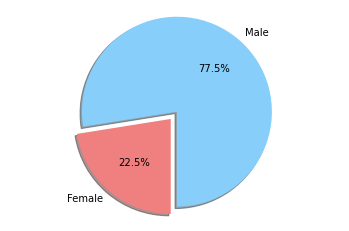

In [5]:
#Creating labels and making it look a bit nice
labels = 'Male', 'Female'
sizes = [total_suicide_can_m, total_suicide_can_f]
colors = ['lightskyblue', 'lightcoral']
explode = (0,0.1)

#Plotting
plt.pie(sizes, explode, labels, colors, autopct = '%1.1f%%', shadow = True, startangle = 270)
plt.axis('equal')
plt.show()


This pie chart demonstrates that the sex distribution of suicides in Canada is overwhelmingly male, with more than 3 times the suicides than females from 1983-2013.

## On average, which age group has the most suicides?

Next, let's look at which age group has the most suicides. The suicide_can DataFrame has classified each suicide per age group, so we can use that! 

The age groups are (in years): 
1. 5-14
2. 15-24
3. 24-34
4. 35-54
5. 55-74
6. 75+

Note that age groups 1 and 2 only represent 10 years, 4 and 5 represent 20 years, and age group 6 represents more than 20 groups. As the progression is not completely linear, we should be expecting a larger number of from age groups 4 onwards.

Let's sort the suidice_can DataFrame by year, it'll help us in later. We'll also sum the suicides per age group to get a rough estimate of how our graph will look like.

In [6]:
#Visualizing age distributions of suicides in a Bar Chart in Canada

suicide_can.sort_values(by=['year'])

#Getting the sums of the suicide per age distribution
suicide_can_0 = suicide_can.loc[suicide_can['age'] == '5-14 years']['suicides_no'].sum()
suicide_can_1 = suicide_can.loc[suicide_can['age'] == '15-24 years']['suicides_no'].sum()
suicide_can_2 = suicide_can.loc[suicide_can['age'] == '25-34 years']['suicides_no'].sum()
suicide_can_3 = suicide_can.loc[suicide_can['age'] == '35-54 years']['suicides_no'].sum()
suicide_can_4 = suicide_can.loc[suicide_can['age'] == '55-74 years']['suicides_no'].sum()
suicide_can_5 = suicide_can.loc[suicide_can['age'] == '75+ years']['suicides_no'].sum()

print('Age group suicides')
print('5-14:', suicide_can_0)
print('15-24:', suicide_can_1)
print('25-34:', suicide_can_2)
print('35-54:', suicide_can_3)
print('55-74:', suicide_can_4)
print('75+:', suicide_can_5)

Age group suicides
5-14: 979
15-24: 15909
25-34: 19997
35-54: 44014
55-74: 20848
75+: 5814


Now that we have all of our values, let's put them into a DataFrame, and then use Seaborn's barplot function to generate a bar plot. I chose to use a bar plot as it the clearest way to visualize the dataset, and come to conclusions based on it.

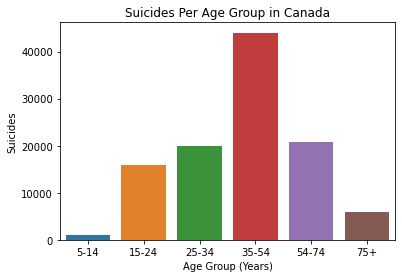

In [7]:
#Entering the values into a dataframe
suicide_can_age = pd.DataFrame({'Age Group (Years)': ['5-14','15-24', '25-34', '35-54', '54-74', '75+'],
                            'Suicides': [suicide_can_0, suicide_can_1, suicide_can_2, suicide_can_3, suicide_can_4, suicide_can_5]})

#Visualizing the data
plt.title('Suicides Per Age Group in Canada')
bar_plot = sn.barplot(x = 'Age Group (Years)', y = 'Suicides', data = suicide_can_age)


plt.show()

Wow! It looks like the age group 35-54 has the most suicides in comparison to everything else. Keep in mind that age group represents 20 years of age, while everything to the left represents only 10 years. Does this mean that if you are 34-54 years old, you are most likely to commit suicide? Well, I'm not here to say that, but the data does show that there are a lot of suicides in that age group.

In fact, why not visualize it in a pie chart to check out the distribution? Let's try using Pandas Pie Chart instead of mathplotlib let we did earlier. 

Unfortunately, Pandas does not show percentage (hence use mathplotlib), so we'll have to do that by ourselves too.

Percentages
5-14 : 0.91 %
15-24 : 14.79 %
25-34 : 18.59 %
35-54 : 40.92 %
54-75 : 19.38 %
75+ : 5.41 %


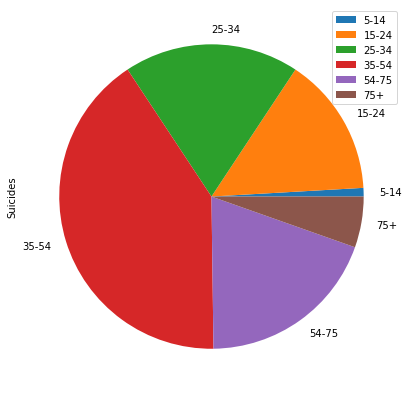

In [8]:
#Creating a new DataFrame to hold values
suicides = [suicide_can_0, suicide_can_1, suicide_can_2, suicide_can_3, suicide_can_4, suicide_can_5]
age_groups = ['5-14', '15-24', '25-34', '35-54', '54-75', '75+']
age_pie = pd.DataFrame({'Suicides': suicides},
                      index = age_groups)
plot = age_pie.plot.pie(y = 'Suicides', subplots = True, figsize = (10,7))

#Getting total suicides in Canada
sum = 0
for i in range(len(suicides)):
    sum+= suicides[i]

#Outputting percentages
print('Percentages')
for i in range(len(suicides)):
    print(age_groups[i], ':', round((100*suicides[i]/sum),2),'%')


From this pie chart, we can see that more than a third of suicides come from people in the age group of 35-54.

But what about the number of suicides per age group get year? This is a great opportunity to use a stacked bar graph, and will flow nicely into our next question! For simplicity sake, I will be categorizing each year into groups by the quarter. It makes for a nicer graph :)

I'll define a function that will create each bar per year group. The function will add up the first 14 suicide numbers. 14 Represents all 7 years in the group, and multiplied by 2 for each sex. This is just how the dataset is organized, and more work can be done to change it, but I thought it was intuitive to do it all in one step.

In [9]:
#Further Visualizing the age distributions of suicides in a Bar Chart Per Year in Canada

#This function sums up the age group's suicides per 7 years (a quarter of the dataset)
def create_bars(suicide,age_group):
    
    #Creating a key-value pair to emulate a switch case function in C++
    group = {'0' : 0, '1': 14, '2': 28, '3': 42}
    
    #Getting the value from the pair
    i = group.get(str(age_group),'default')
    
    #Ensure the loop runs for only a quarter
    runs = int(i) + 13
    
    #Resetting the total
    total = 0
    
    #Loop will run for 14 times
    for i in range(runs):
        #Summing the amount of suicides
        total+= suicide.iloc[i]['suicides_no']
    return total

Cool! Now that we have our function, lets create the bars. Each bar will represent the amount of suicides per age group, per year group. 

I'll start by classifying the suicides per age group, then creating each bar as an array to hold the amount of suicides poer age group per year group. 

In [10]:
#Classifying suicides per age group
suicide_can_0 = suicide_can.loc[suicide_can['age'] == '5-14 years']
suicide_can_1 = suicide_can.loc[suicide_can['age'] == '15-24 years']
suicide_can_2 = suicide_can.loc[suicide_can['age'] == '25-34 years']
suicide_can_3 = suicide_can.loc[suicide_can['age'] == '35-54 years']
suicide_can_4 = suicide_can.loc[suicide_can['age'] == '55-74 years']
suicide_can_5 = suicide_can.loc[suicide_can['age'] == '75+ years']

#Creating each individual bar for every age group per 7 years (quarter) using the defined function
bar_0 = [create_bars(suicide_can_0,0), create_bars(suicide_can_1,0), 
         create_bars(suicide_can_2,0), create_bars(suicide_can_3,0), 
         create_bars(suicide_can_4,0), create_bars(suicide_can_5,0)]
bar_1 = [create_bars(suicide_can_0,1), create_bars(suicide_can_1,1), 
         create_bars(suicide_can_2,1), create_bars(suicide_can_3,1), 
         create_bars(suicide_can_4,1), create_bars(suicide_can_5,1)]
bar_2 = [create_bars(suicide_can_0,2), create_bars(suicide_can_1,2), 
         create_bars(suicide_can_2,2), create_bars(suicide_can_3,2), 
         create_bars(suicide_can_4,2), create_bars(suicide_can_5,2)]
bar_3 = [create_bars(suicide_can_0,3), create_bars(suicide_can_1,3), 
         create_bars(suicide_can_2,3), create_bars(suicide_can_3,3), 
         create_bars(suicide_can_4,3), create_bars(suicide_can_5,3)]


All that's left is to format the stacked bar chart, and plot it. Note how I'm stacking each bar on top of eachother to create the visualization.

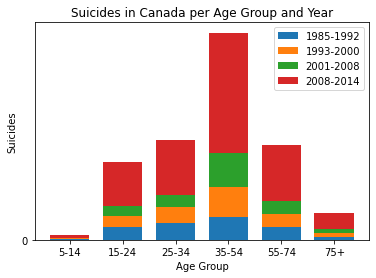

In [11]:
#Creating index array and intializing the width of the bars
ind = [0,1,2,3,4,5]
width = 0.75

#Creating each bar section
p0 = plt.bar(ind, bar_0, width)
p1 = plt.bar(ind, bar_1, width, bottom = bar_0)
p2 = plt.bar(ind, bar_2, width, bottom = bar_1)
p3 = plt.bar(ind, bar_3, width, bottom = bar_2)

#Labelling the Graph
plt.ylabel('Suicides')
plt.xlabel('Age Group')
plt.title('Suicides in Canada per Age Group and Year')
plt.xticks(ind, ('5-14','15-24','25-34','35-54','55-74','75+'))
plt.yticks(np.arange(0, 5, 10))
plt.legend((p0[0], p1[0], p2[0], p3[0]), ('1985-1992', '1993-2000', '2001-2008','2008-2014'))

#displaying Graph
plt.show()

Looks good! It seems like there is an awful amount of suicides in the last quadrant, from the years 2008-2014. Let's see if it has been goingup, i.e: Are the numbers of suicides increasing per year?

## Are the numbers of suicides increasing per year?

Let's check this out by making a new DataFrame holding the years and the total suicides per year. The for loop sums the total suicides, and then appends them to our new DataFrame.

In [15]:
#Creating a new DataFrame to hold suicides per year
suicide_year_can = pd.DataFrame(columns = ['Year', 'Suicides'])

year = 1985

#Loop will run for the amount of years
for i in range(29):
    #Creating a temporary dataframe, and appending it to existing.
    temp_df = pd.DataFrame({'Year': [year], 
                            'Suicides' :[suicide_can.loc[suicide_can['year'] == year]['suicides_no'].sum()]})
    suicide_year_can = suicide_year_can.append(temp_df, ignore_index = True)
    year+=1

suicide_year_can

,Year,Suicides
0,1985,3258
1,1986,3670
2,1987,3591
3,1988,3510
4,1989,3491
5,1990,3378
6,1991,3593
7,1992,3708
8,1993,3803
9,1994,3748


Now that we have our suicides per year, let's make a scatter plot with Matplotlib. I'm using the numpy polyfit function to calculate the slope and line of best fit for our regression line.

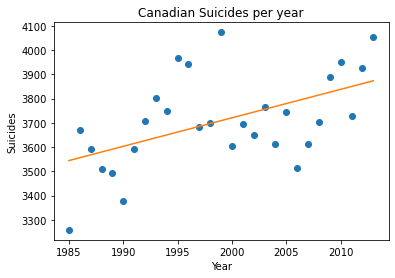

In [13]:
m,b = np.polyfit(np.array(suicide_year_can.Year,dtype=float),np.array(suicide_year_can.Suicides,dtype=float),1)

plt.plot(suicide_year_can.Year, suicide_year_can.Suicides,'o')
plt.plot(suicide_year_can.Year,m*suicide_year_can.Year + b )
plt.title('Canadian Suicides per year')
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.show()

Well that doesn't look too convincing. Yes, the regression line is increasing, but not by much, let's compare this to the world suicides per year and see if they're alike! Let's just follow the process we had before.

In [16]:
#Creating a new DataFrame to hold suicides per year
suicide_year = pd.DataFrame(columns = ['Year', 'Suicides'])

year = 1985

#Loop will run for the amount of years
for i in range(29):
    #Creating a temporary dataframe, and appending it to existing.
    temp_df = pd.DataFrame({'Year': [year], 
                            'Suicides' :[suicide.loc[suicide['year'] == year]['suicides_no'].sum()]})
    suicide_year = suicide_year.append(temp_df, ignore_index = True)
    year+=1

suicide_year

,Year,Suicides
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


Now let's plot it!

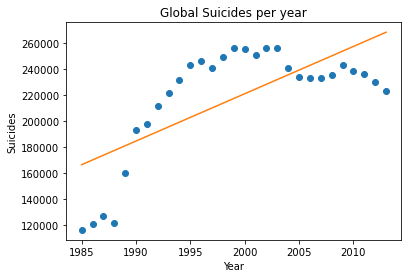

In [17]:
m,b = np.polyfit(np.array(suicide_year.Year,dtype=float),np.array(suicide_year.Suicides,dtype=float),1)

plt.plot(suicide_year.Year, suicide_year.Suicides,'o')
plt.plot(suicide_year.Year,m*suicide_year.Year + b )
plt.title('Global Suicides per year')
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.show()

Although there is a big jump in suicides from 1988 to 1990, there still isn't a clear enough relationship for us to determine that the amount of suicides have gone up with every year.

# Conclusion

If you made it down here, I would first like to thank you for reading! This is my first project in data science, and I'm excited to keep analyzing data, and come to appropriate conclusions.

Reminder that the question posed are all Canada-based.

Here were the questions I aim to answer:
1. What is the sex distribution of suicides (male-female)?
2. On average, which age group has the most suicides?
3. In which period of years had the most suicides?
4. Are the numbers of suicides increasing per year?

Here are my conclusions
1. The sex distribution of suicides is overwhelmingly male-dominated, with males making up three times more suicides than woman (77.5% : 22.5%)
2. On average, the age group of 34-55 had the most suicides, being responsible for 40.92% of total suicides in Canada for the time period.
3. 2008-2014 period had the most suicides.
4. Interestingly, no! There isn't a strong enough correlation to confidently say that there is a positive correlation between the years and suicide numbers.

Once again, thank you for taking the time to read all of this! This notebook has given me a entry into the world of data science, and I can't wait to see what's next :)
Feel free to reach out to me if you have any questions/comments/suggestions on how I can improve for the future.

Contact info:

LinkedIn: https://www.linkedin.com/in/quinn-ha/

Email: hab8@mcmaster.ca

